In [130]:
%pip install pandas
%pip install matplotlib
%pip install seaborn



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
PATH_TO_EVALUATION_RESULT_ITERATION_1_QUANT = '../Ergebnisse/evaluation_iteration1_quantitativ.csv'

In [133]:
def read_csv_to_dataframe(file_path):
    try:
        df = pd.read_csv(file_path)
        return df
    except FileNotFoundError:
        print(f"No file found in path: '{file_path}'")
        return None
    except Exception as e:
        print(f"Error reading data: {str(e)}")
        return None

df_iteration_1 = read_csv_to_dataframe(PATH_TO_EVALUATION_RESULT_ITERATION_1_QUANT)

if df_iteration_1 is not None:
    print(df_iteration_1.head())

  PROBAND_CODE        ENTWURF  FRAGE_CODE ITEM_CODE  \
0   PROBAND_01  FARBCODIERUNG  F_SKALA_01   ITEM_01   
1   PROBAND_01  FARBCODIERUNG  F_SKALA_02   ITEM_02   
2   PROBAND_01  FARBCODIERUNG  F_SKALA_03   ITEM_03   
3   PROBAND_01  FARBCODIERUNG  F_SKALA_04   ITEM_04   
4   PROBAND_01  FARBCODIERUNG  F_SKALA_05   ITEM_05   

                                          FRAGE_TEXT ITEM_REFERENZ  \
0  Die Darstellung von konkreten Aufrufbeziehunge...   Darstellung   
1  Die Anwendung der Farbcodierung mit Legende zu...     Anwendung   
2  Die Darstellung von konkreten Aufrufbeziehunge...   Darstellung   
3  Die Darstellung von konkreten Aufrufbeziehunge...   Darstellung   
4  Das Gesamtbild erscheint mir durch die Farbcod...    Gesamtbild   

       ITEM_NEGATIV      ITEM_POSITIV       UX_DIMENSION  ANTWORT INFO  
0    unverständlich      verständlich  DURCHSCHAUBARKEIT        4  NaN  
1  schwer zu lernen  leicht zu lernen  DURCHSCHAUBARKEIT        5  NaN  
2       kompliziert          

In [134]:
import pandas as pd

def calculate_min_max_mode_by_dim(df):
    # Group by 'ENTWURF' and then 'UX_DIMENSION'
    grouped_data = df.groupby(['ENTWURF', 'UX_DIMENSION'])

    # Calculate min, max, and mode for each group
    result = grouped_data.agg({
        'ANTWORT': ['min', 'max', lambda x: x.mode().iloc[0] if not x.mode().empty else None]
    })

    # Rename the columns for clarity
    result.columns = ['Minimum', 'Maximum', 'Modus']

    # Create classes and calculate occurrences for each class
    bins = [0, 2, 3, 5, 7]
    class_occurrences = grouped_data['ANTWORT'].apply(lambda x: pd.cut(x, bins=bins, labels=False, right=False).value_counts()).unstack(fill_value=0)

    # Add the occurrences columns to the result
    result = pd.concat([result, class_occurrences], axis=1)

    # Rename the columns based on the class intervals
    result.columns = ['Minimum', 'Maximum', 'Modus', '1-2', '3', '4-5', '6-7']

    # Sort the index based on the specified order of 'ENTWURF'
    result = result.loc[['FARBCODIERUNG', 'PFEILSYSTEM', 'ANIMATION']]

    return result

result_df = calculate_min_max_mode_by_dim(df_iteration_1)
print(result_df)

                                 Minimum  Maximum  Modus  1-2  3  4-5  6-7
ENTWURF       UX_DIMENSION                                                
FARBCODIERUNG DURCHSCHAUBARKEIT        3        7      6    0  0    4   11
              EFFIZIENZ                2        7      5    0  1    4   12
PFEILSYSTEM   DURCHSCHAUBARKEIT        3        7      6    0  0    6   10
              EFFIZIENZ                3        7      6    0  0    6    9
ANIMATION     DURCHSCHAUBARKEIT        2        7      6    0  2    2   10
              EFFIZIENZ                1        7      5    1  2    6    8


In [135]:
def plot_mode_min_max(data_frame):
    plt.figure(figsize=(6, 5.5))

    # Define a custom color palette
    custom_palette = {'DURCHSCHAUBARKEIT': '#2979b5', 'EFFIZIENZ': '#4da6ff'}

    # Plot the bar plot without dotting and hatching
    ax = sns.barplot(x="ENTWURF", y="Modus", hue="UX_DIMENSION", data=result_df, errorbar=None, width=0.5, palette=custom_palette)

    # Add error bars for Min and Max values with a different color
    min_values = result_df['Minimum']
    max_values = result_df['Maximum']
    for i, (bar, min_val, max_val) in enumerate(zip(ax.patches, min_values, max_values)):
        hue_index = i % len(result_df.index.levels[1])
        ax.errorbar(
            x=bar.get_x() + bar.get_width() / 2,
            y=result_df['Modus'].iloc[i],
            yerr=[[result_df['Modus'].iloc[i] - min_val], [max_val - result_df['Modus'].iloc[i]]],
            color='black',  # Change the color to red (you can choose any color you prefer)
            fmt='-',  # Use a solid line
            capsize=5,
        )

    # Set labels and legend
    ax.set_title(None)  # Remove the title
    plt.xlabel('ENTWURF')
    plt.ylabel('Modus')

    # Modify legend labels for side-by-side display
    legend_labels = result_df.index.levels[1].tolist()
    plt.legend(title='UX_DIMENSION', labels=legend_labels, loc='upper right')

    # Set y-axis limits with a lower limit of 0
    plt.ylim(0, 9)

    # Hide specific y-axis tick labels
    plt.yticks([1, 2, 3, 4, 5, 6, 7])

    plt.xlabel('Entwurf')  # Change the x-axis label
    plt.ylabel('Modus, Min, Max')  # Change the y-axis label

    # Modify legend labels for side-by-side display
    legend_labels = result_df.index.levels[1].tolist()
    plt.legend(title='UX Dimension', labels=legend_labels, loc='upper right')

    # Show the plot
    plt.show()


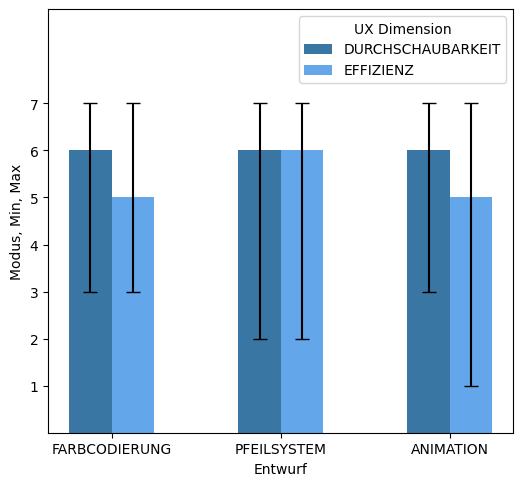

,PROBAND_CODE,ENTWURF,FRAGE_CODE,ITEM_CODE,FRAGE_TEXT,ITEM_REFERENZ,ITEM_NEGATIV,ITEM_POSITIV,UX_DIMENSION,ANTWORT,INFO
0,PROBAND_01,FARBCODIERUNG,F_SKALA_01,ITEM_01,Die Darstellung von konkreten Aufrufbeziehunge...,Darstellung,unverständlich,verständlich,DURCHSCHAUBARKEIT,4,NaN
1,PROBAND_01,FARBCODIERUNG,F_SKALA_02,ITEM_02,Die Anwendung der Farbcodierung mit Legende zu...,Anwendung,schwer zu lernen,leicht zu lernen,DURCHSCHAUBARKEIT,5,NaN
2,PROBAND_01,FARBCODIERUNG,F_SKALA_03,ITEM_03,Die Darstellung von konkreten Aufrufbeziehunge...,Darstellung,kompliziert,einfach,DURCHSCHAUBARKEIT,6,NaN
3,PROBAND_01,FARBCODIERUNG,F_SKALA_04,ITEM_04,Die Darstellung von konkreten Aufrufbeziehunge...,Darstellung,verwirrend,übersichtlich,DURCHSCHAUBARKEIT,6,NaN
4,PROBAND_01,FARBCODIERUNG,F_SKALA_05,ITEM_05,Das Gesamtbild erscheint mir durch die Farbcod...,Gesamtbild,überladen,aufgeräumt,EFFIZIENZ,6,NaN


In [136]:
plot_mode_min_max(result_df)
df_iteration_1.head()


/var/folders/sb/2t93l3953s1gnjp5qkxd_bpc0000gn/T/ipykernel_71816/2528651586.py:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=summed_values.index.get_level_values('ENTWURF'), y=summed_values.values, hue=summed_values.index.get_level_values('ANTWORT'), palette=custom_palette, order=custom_order, dodge=True, ci=None)
/var/folders/sb/2t93l3953s1gnjp5qkxd_bpc0000gn/T/ipykernel_71816/2528651586.py:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=summed_values.index.get_level_values('ENTWURF'), y=summed_values.values, hue=summed_values.index.get_level_values('ANTWORT'), palette=custom_palette, order=custom_order, dodge=True, ci=None)


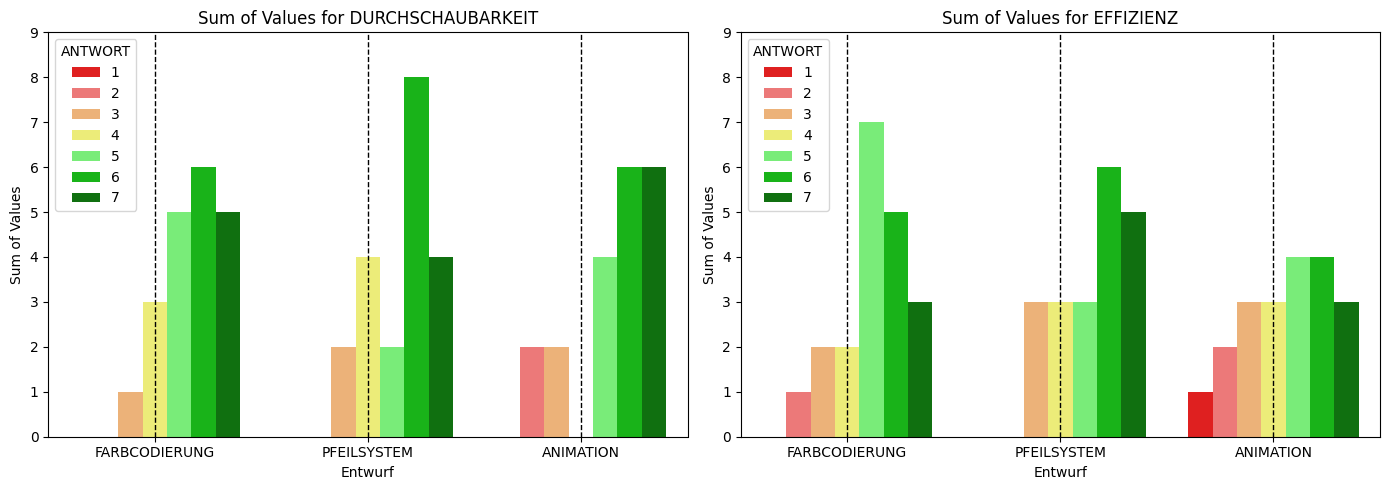

In [137]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_summed_values_per_dimension_vertical_sorted_with_legend_and_lines(df):
    # Group by 'UX_DIMENSION', 'ENTWURF', and 'ANTWORT'
    grouped_data = df.groupby(['UX_DIMENSION', 'ENTWURF', 'ANTWORT'])

    # Define dimensions to plot separately
    dimensions_to_plot = df['UX_DIMENSION'].unique()

    # Set the size of the chart
    plt.figure(figsize=(14, 5))

    # Define the custom order for the models
    custom_order = ['FARBCODIERUNG', 'PFEILSYSTEM', 'ANIMATION']

    # Define a custom color palette based on the specified colors
    custom_palette = sns.color_palette(['red', '#FF6666', '#FFB266', '#FFFF66', '#66FF66', '#00CC00', 'green'])

    # Iterate through each dimension
    for i, dimension in enumerate(dimensions_to_plot, start=1):
        plt.subplot(1, len(dimensions_to_plot), i)

        # Extract data for the current dimension
        try:
            dimension_data = df[df['UX_DIMENSION'] == dimension]
        except KeyError:
            continue  # Skip if the combination does not exist in the data

        # Calculate the sum of values for each model
        summed_values = dimension_data.groupby(['ENTWURF', 'ANTWORT']).size().unstack(fill_value=0).stack()

        # Add a dummy entry for value 1 in each group
        for model in custom_order:
            if (model, 1) not in summed_values.index:
                summed_values.loc[model, 1] = 0

        # Plot vertical bars with custom order, adjusted width, and custom color palette
        sns.barplot(x=summed_values.index.get_level_values('ENTWURF'), y=summed_values.values, hue=summed_values.index.get_level_values('ANTWORT'), palette=custom_palette, order=custom_order, dodge=True, ci=None)

        # Add vertical lines in the middle (at 4)
        plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
        plt.axvline(x=1, color='black', linestyle='--', linewidth=1)
        plt.axvline(x=2, color='black', linestyle='--', linewidth=1)

        # Add a cross at the specified position (0, 4)
        # plt.scatter(0, 4, marker='x', color='red', s=100)

        # Set labels and legend
        plt.title(f'Sum of Values for {dimension}')
        plt.xlabel('Entwurf')
        plt.ylabel('Sum of Values')
        plt.legend(title='ANTWORT', loc='upper left')

        # Set y-axis limits to always go up to 10
        plt.ylim(0, 9)

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

# Example usage with your DataFrame
plot_summed_values_per_dimension_vertical_sorted_with_legend_and_lines(df_iteration_1)


/var/folders/sb/2t93l3953s1gnjp5qkxd_bpc0000gn/T/ipykernel_71816/2188012104.py:19: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.barplot(x='ENTWURF', y='SUM', hue='ITEM_CODE', data=grouped_data, palette=custom_palette)


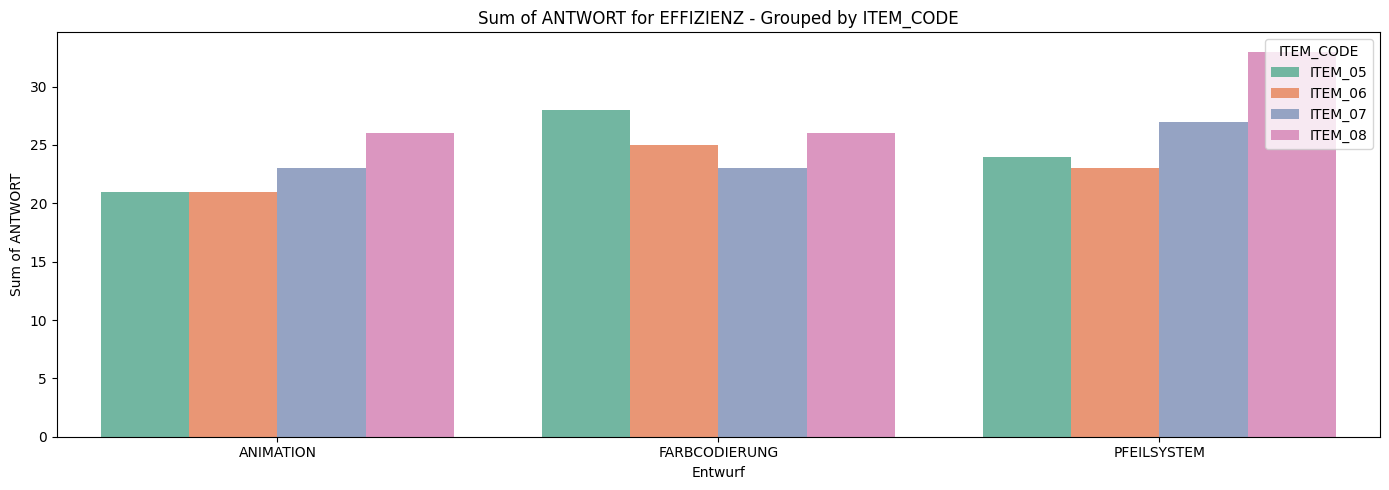

/var/folders/sb/2t93l3953s1gnjp5qkxd_bpc0000gn/T/ipykernel_71816/2188012104.py:19: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.barplot(x='ENTWURF', y='SUM', hue='ITEM_CODE', data=grouped_data, palette=custom_palette)


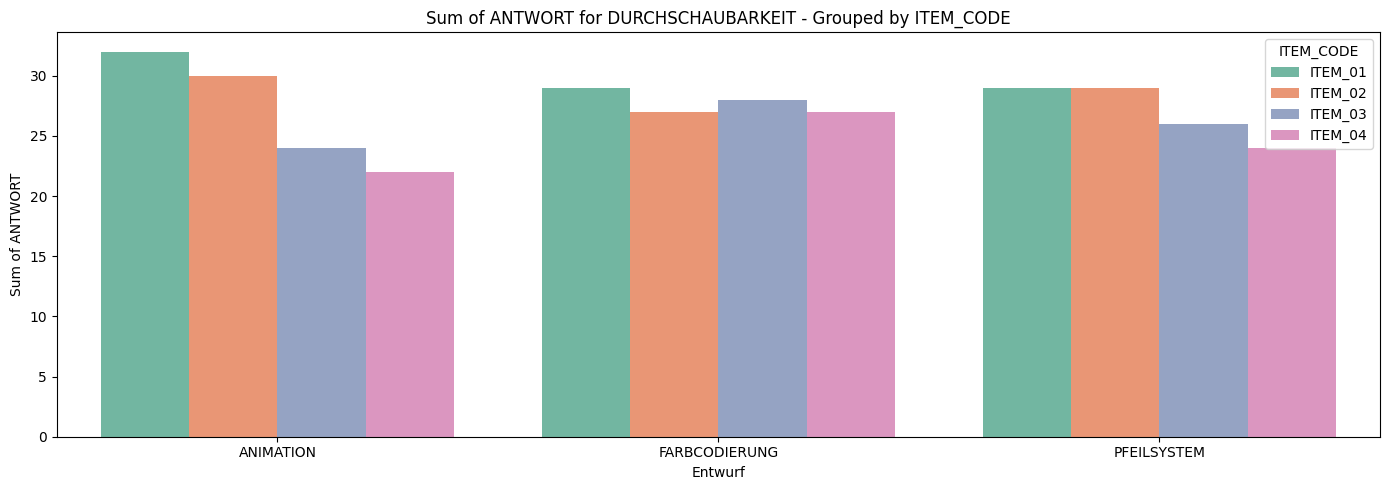

In [138]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_sums_per_item_code(df, ux_dimension):
    # Filter the DataFrame for the specified UX_DIMENSION
    filtered_df = df[df['UX_DIMENSION'] == ux_dimension]

    # Group by 'ENTWURF', 'ITEM_CODE', and sum 'ANTWORT' for each group
    grouped_data = filtered_df.groupby(['ENTWURF', 'ITEM_CODE'])['ANTWORT'].sum().reset_index(name='SUM')

    # Set the size of the chart
    plt.figure(figsize=(14, 5))

    # Use a color palette
    custom_palette = sns.color_palette("Set2")

    # Plot the bar chart
    sns.barplot(x='ENTWURF', y='SUM', hue='ITEM_CODE', data=grouped_data, palette=custom_palette)

    # Add labels and legend
    plt.title(f'Sum of ANTWORT for {ux_dimension} - Grouped by ITEM_CODE')
    plt.xlabel('Entwurf')
    plt.ylabel('Sum of ANTWORT')
    plt.legend(title='ITEM_CODE', loc='upper right')

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

# Example usage with your DataFrame for 'EFFIZIENZ'
plot_sums_per_item_code(df_iteration_1, 'EFFIZIENZ')

# Example usage with your DataFrame for 'DURCHSCHAUBARKEIT'
plot_sums_per_item_code(df_iteration_1, 'DURCHSCHAUBARKEIT')
